# Importing all the libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
#Setting to display the complete set of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Upload and Basic Exploration

In [3]:
# Importing file
df=pd.read_csv("loan.csv")
#Basic Exploration
df.head()
df.describe()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning

In [4]:
# Checking duplicate rows
print(df.duplicated(subset=None,keep='first').count())

39717


In [5]:
# Checking duplicate rows using id column
duplicate_rows=df[df.duplicated(['id'])]
print("duplicate_rows :", duplicate_rows)

duplicate_rows : Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_

In [6]:
# There are no duplicate rows

In [7]:
#Finding Missing Values
missing_info=pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
missing_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
missing_info

,col_name,null_count
0,id,0
1,earliest_cr_line,0
2,inq_last_6mths,0
3,open_acc,0
4,pub_rec,0
5,revol_bal,0
6,total_acc,0
7,initial_list_status,0
8,out_prncp,0
9,out_prncp_inv,0


In [8]:
# Finding Missing values percentage
missing_info['missing_pct']=missing_info['null_count']/df.shape[0]*100
missing_info

,col_name,null_count,missing_pct
0,id,0,0.000000
1,earliest_cr_line,0,0.000000
2,inq_last_6mths,0,0.000000
3,open_acc,0,0.000000
4,pub_rec,0,0.000000
5,revol_bal,0,0.000000
6,total_acc,0,0.000000
7,initial_list_status,0,0.000000
8,out_prncp,0,0.000000
9,out_prncp_inv,0,0.000000


In [9]:
# Finding higher missing percentage values
missing_col=missing_info[missing_info['missing_pct']>=30]['col_name'].to_list()
len(missing_col)

58

In [10]:
# Drop columns with missing values above threshold 
df_missing_removed=df.drop(labels=missing_col,axis=1)
df_missing_removed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
# Finding missing percentage values on the updated dataframe
df_missing_removed.isnull().sum().sort_values()/df_missing_removed.shape[0]*100

id                            0.000000
earliest_cr_line              0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
delinq_2yrs                   0.000000
total_pymnt_inv               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
policy_code                   0.000000
application_type              0.000000
acc_now_delinq                0.000000
delinq_amnt                   0.000000
total_rec_prncp               0.000000
dti                           0.000000
inq_last_6mths                0.000000
zip_code                      0.000000
member_id                

In [12]:
# Dropping additional columns
add_col_drop=["member_id","url","title","emp_title","zip_code","tax_liens"]
df_missing_removed.drop(labels=add_col_drop,axis=1,inplace=True)

In [13]:
df_missing_removed.shape

(39717, 47)

In [14]:
df_missing_removed.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc   

In [15]:
# Manipulation on Employee length to replace with 0
df_missing_removed.emp_length.fillna('0',inplace=True)
df_missing_removed['emp_length']=df_missing_removed.emp_length.str.extract('(\d+)')
df_missing_removed.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [19]:
# Manipulation on pub_rec_bankruptcies
df_missing_removed.pub_rec_bankruptcies.isnull().sum()
df_missing_removed.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
df_missing_removed.pub_rec_bankruptcies.isnull().sum()

0

In [20]:
# Manipulation on interest rate column and revol_util to remove %
df_missing_removed['int_rate']=df_missing_removed['int_rate'].str.rstrip('%')
df_missing_removed['revol_util']=df_missing_removed['revol_util'].str.rstrip('%')

In [21]:
# Converting amount columns to numeric
amt_columns=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df_missing_removed[amt_columns]=df_missing_removed[amt_columns].apply(pd.to_numeric)

# Dropping current customers

In [22]:
df_missing_removed = df_missing_removed[df_missing_removed.loan_status != "Current"]

In [23]:
df_missing_removed.shape
df_missing_removed.info()
df_missing_removed.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  issue_d                     385

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc   

In [24]:
# Delete rows containing either 50% or more than 50% NaN Values
perc = 50.0 # Here N is 50
min_count =  int(((100-perc)/100)*df_missing_removed.shape[1] + 1)
min_count

24

In [26]:
mod_df = df_missing_removed.dropna( axis=0, thresh=min_count)
mod_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [27]:
# Finding out percentages of various loan_status out of total loans issued
(mod_df.loan_status.value_counts()*100)/len(mod_df)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [28]:
# Finding out percentages of various purpose of loans out of total loans issued
(mod_df.purpose.value_counts()*100)/len(mod_df)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

# Outlier identification and removal

<AxesSubplot:xlabel='annual_inc'>

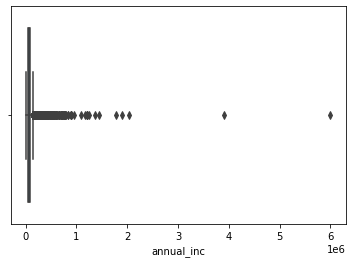

In [30]:
# Annual Income
sns.boxplot(mod_df.annual_inc)

In [31]:
quant_info =mod_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [34]:
# There are outliers. Considering a threshold of .95
mod_df=mod_df[mod_df["annual_inc"]< mod_df["annual_inc"].quantile(0.95)]
mod_df['annual_inc'].describe()

count     34794.000000
mean      57329.812259
std       23739.902046
min        4000.000000
25%       39750.000000
50%       54996.000000
75%       74000.000000
max      116765.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

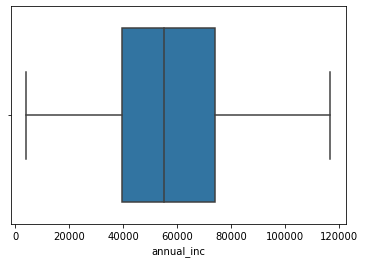

In [35]:
sns.boxplot(mod_df.annual_inc)

In [ ]:
# Box plot for some variables
sns.boxplot(mod_df.loan_amt)
sns.boxplot(mod_df.total_pymnt)
sns.boxplot(mod_df.int_rate)
# No outliers observed. Distribution is continuous

In [36]:
# Removing additional columns which are having only single values or not significant for analysis
add_col_2=["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
mod_df.drop(labels=add_col_2,axis=1,inplace=True)
mod_df.shape
mod_df.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    48
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

# Creating Bins

In [37]:
#Creating categories for annual incomes for further bivariate analysis
mod_df['annual_inc_categories']=pd.cut(mod_df['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
mod_df['interest_rate_categories']=pd.cut(mod_df['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
mod_df['dti_categories']=pd.cut(mod_df['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(mod_df.shape)

mod_df.head(5)

(34794, 45)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,annual_inc_categories,interest_rate_categories,dti_categories
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0,0.0,0,0.0,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,0.0,0,0.0,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.0,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0,0.0,0,0.0,0-20000,12.5-16,5-10
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,0.0,0,0.0,40000-60000,12.5-16,15-20
5,1075269,5000,5000,5000.0,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,0,0.0,0,0.0,20000-40000,0-10,10-15


In [39]:
mod_df.dtypes.value_counts()

float64     16
object      14
int64       12
category     1
category     1
category     1
dtype: int64

In [41]:
obj_var=df_missing_removed.select_dtypes(include=['object','category']).columns
obj_var

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [42]:
num_var=df_missing_removed.select_dtypes(include=['float64','int64']).columns
num_var

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt'],
      dtype='object')

# Univariate Analysis

Hisplot of id


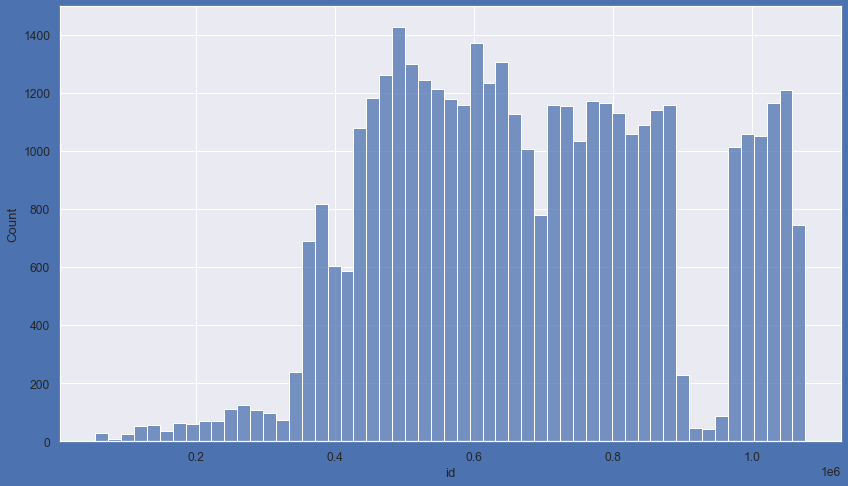

Hisplot of loan_amnt


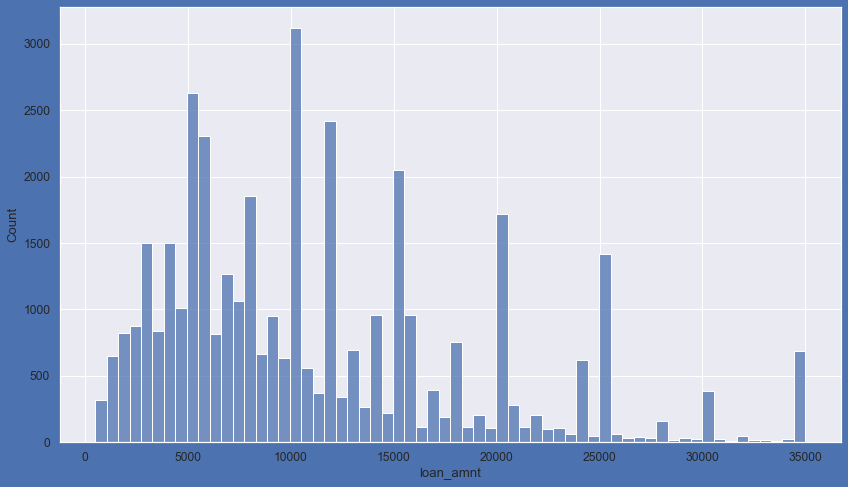

Hisplot of funded_amnt


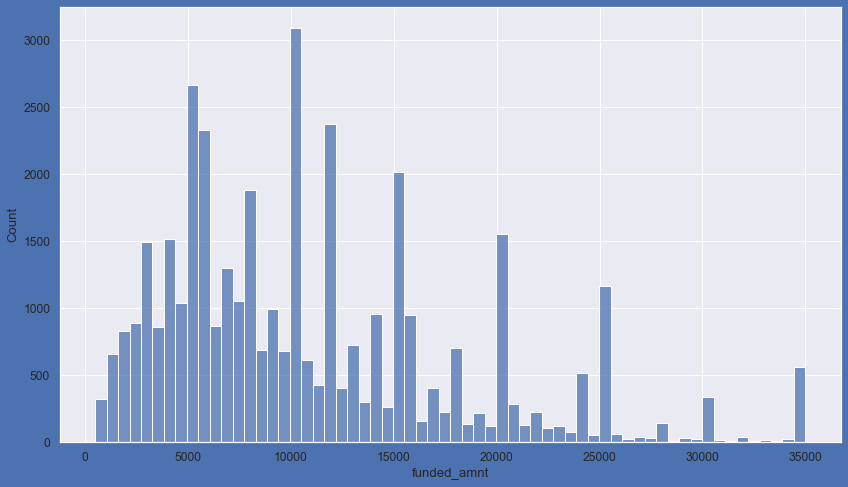

Hisplot of funded_amnt_inv


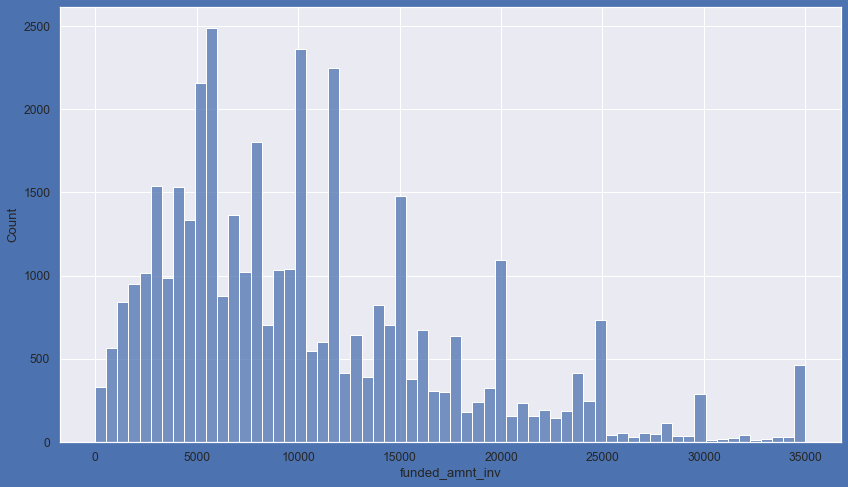

Hisplot of int_rate


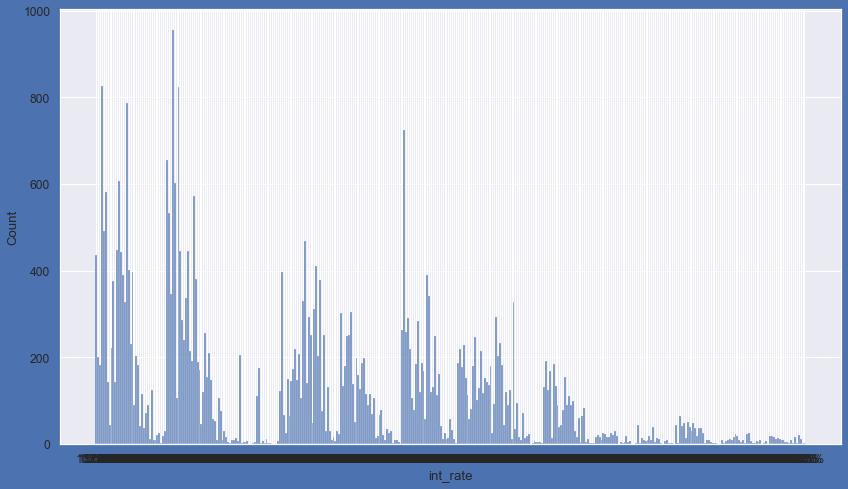

Hisplot of installment


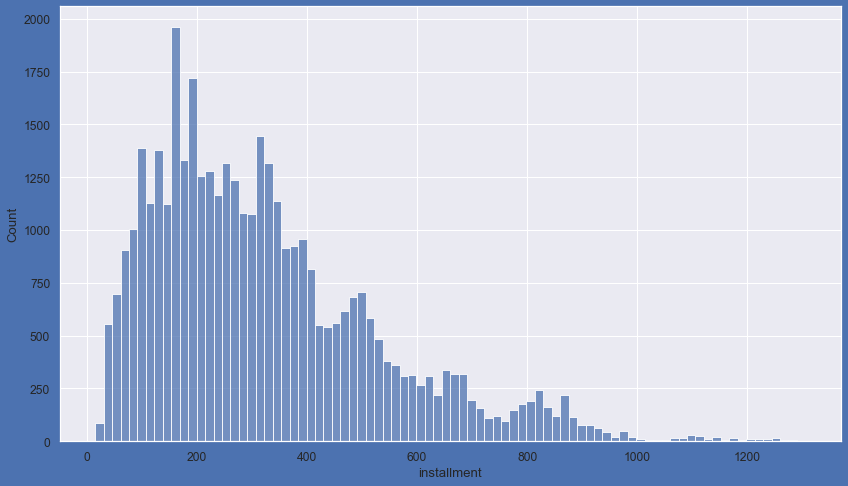

Hisplot of emp_length


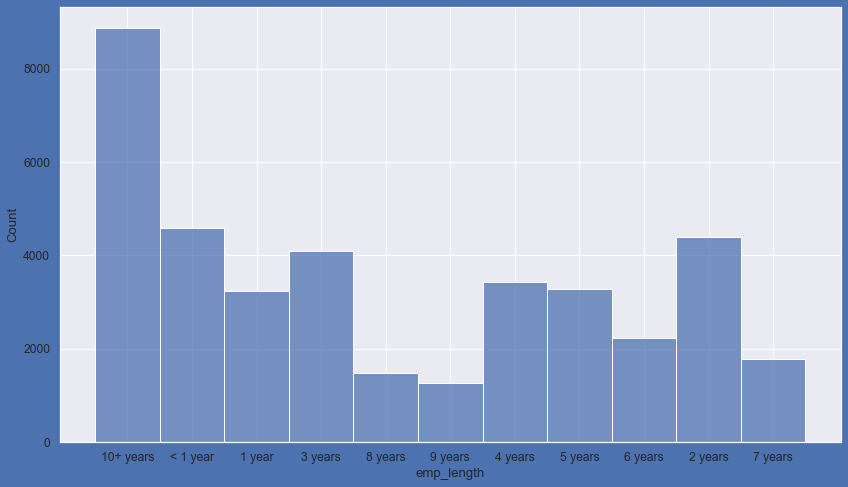

Hisplot of annual_inc


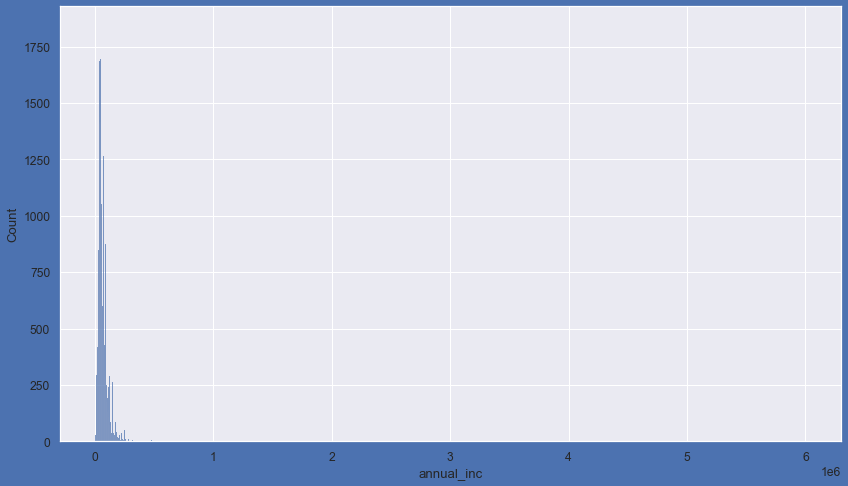

Hisplot of dti


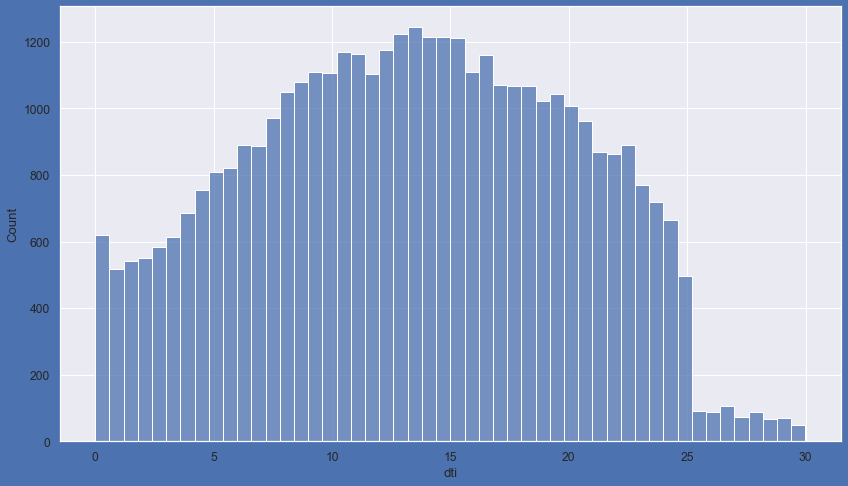

Hisplot of delinq_2yrs


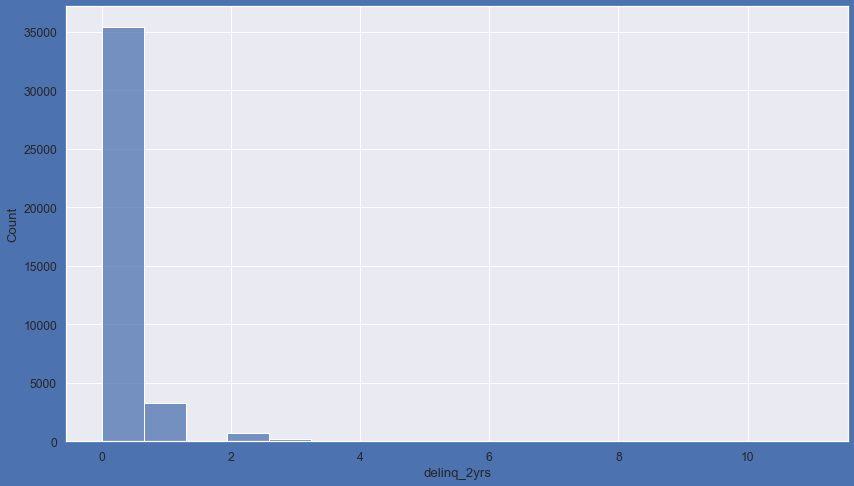

Hisplot of inq_last_6mths


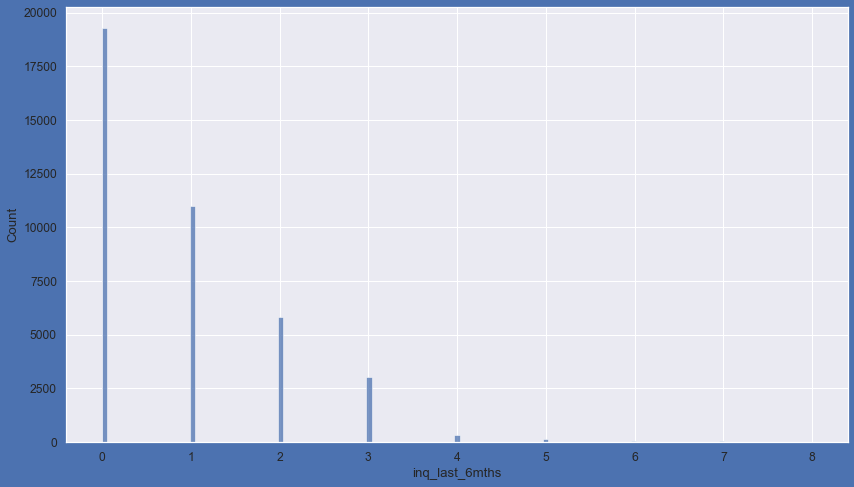

Hisplot of open_acc


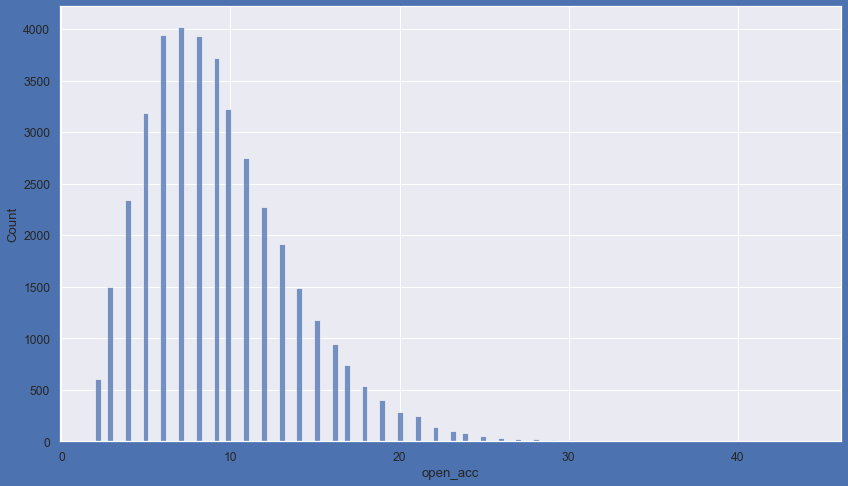

Hisplot of pub_rec


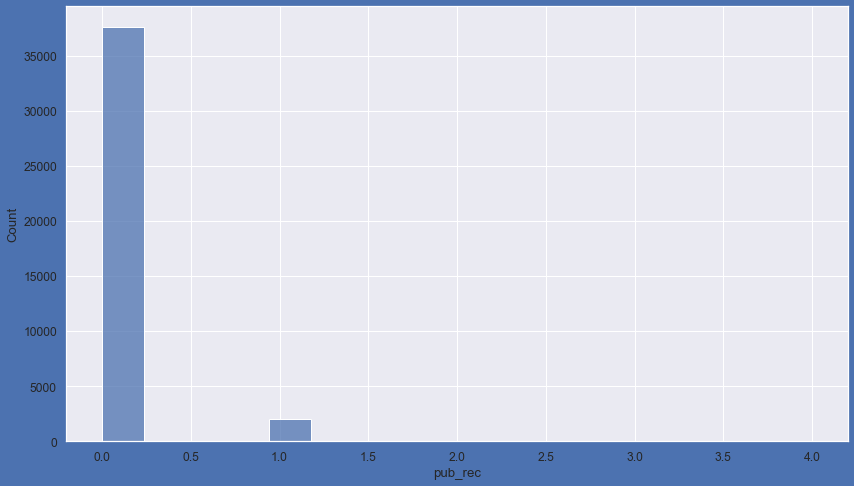

Hisplot of revol_bal


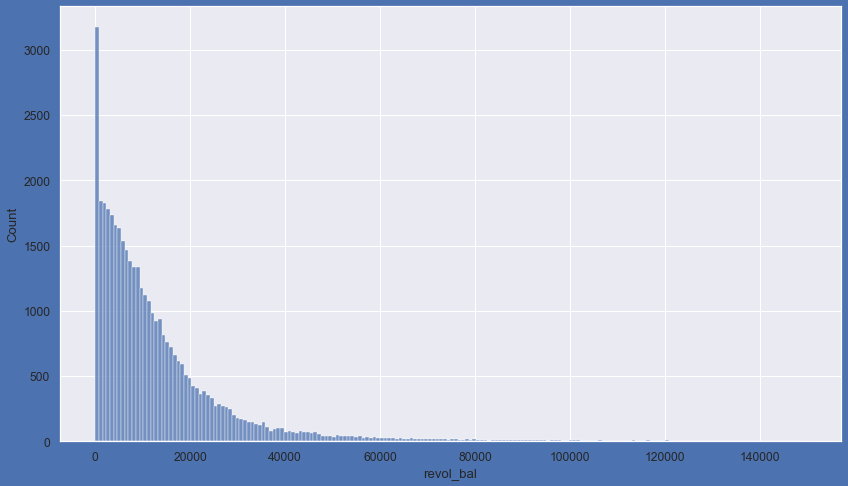

Hisplot of total_acc


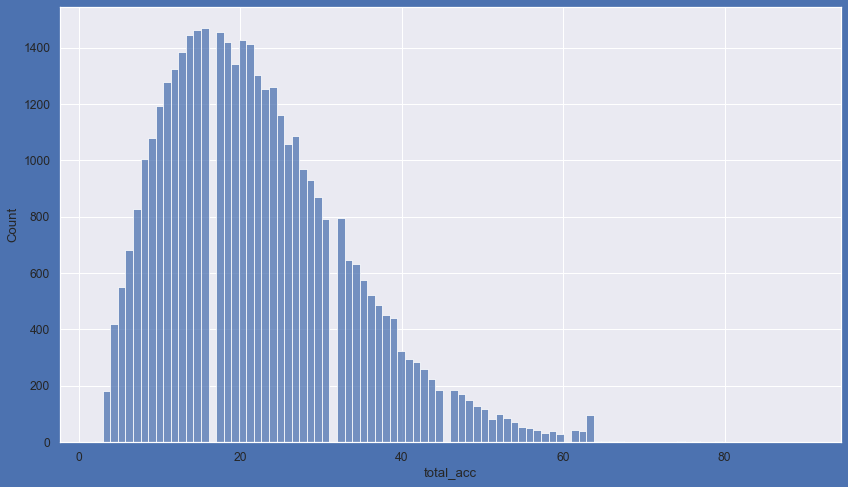

Hisplot of out_prncp


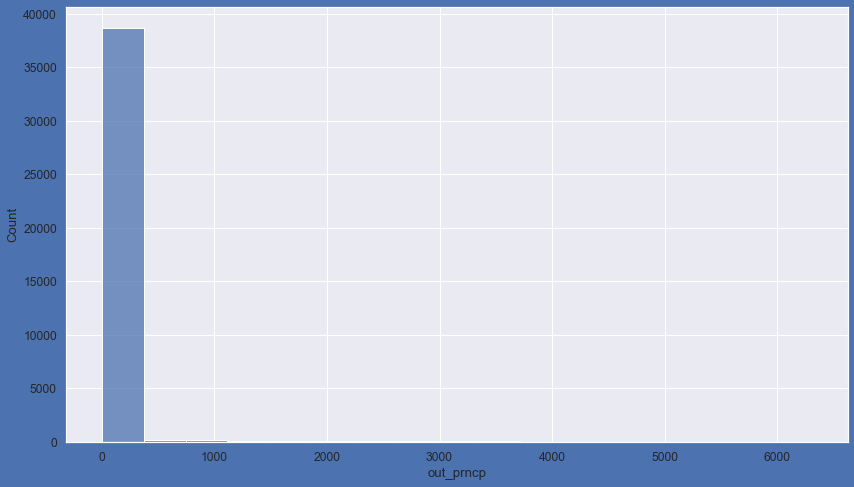

Hisplot of out_prncp_inv


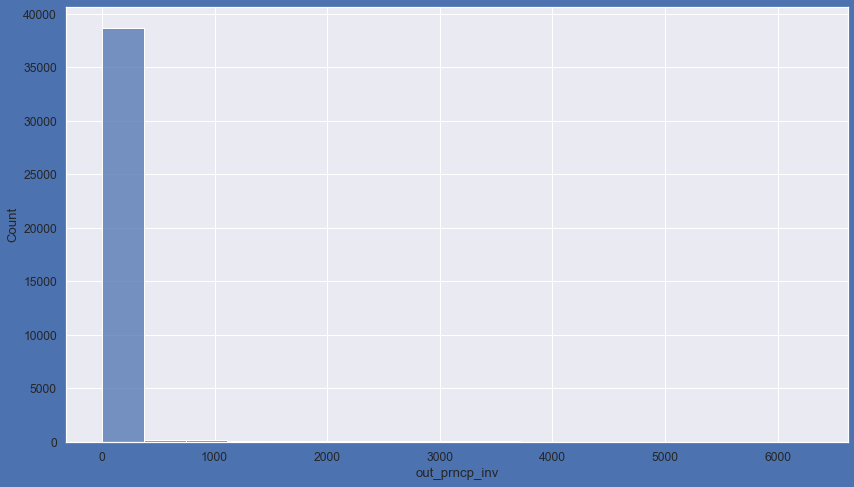

Hisplot of total_pymnt


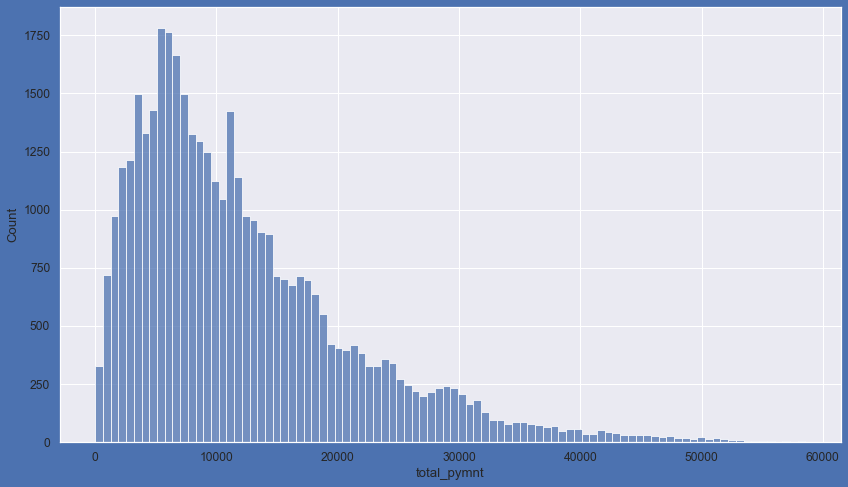

Hisplot of total_pymnt_inv


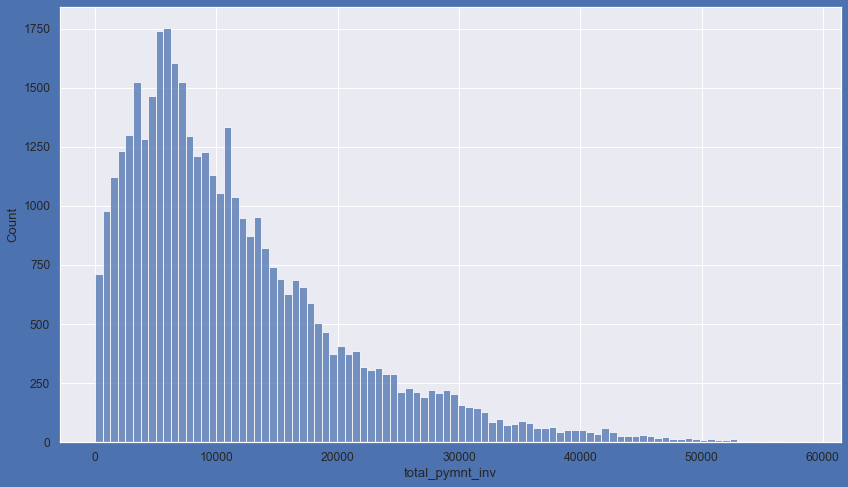

Hisplot of total_rec_prncp


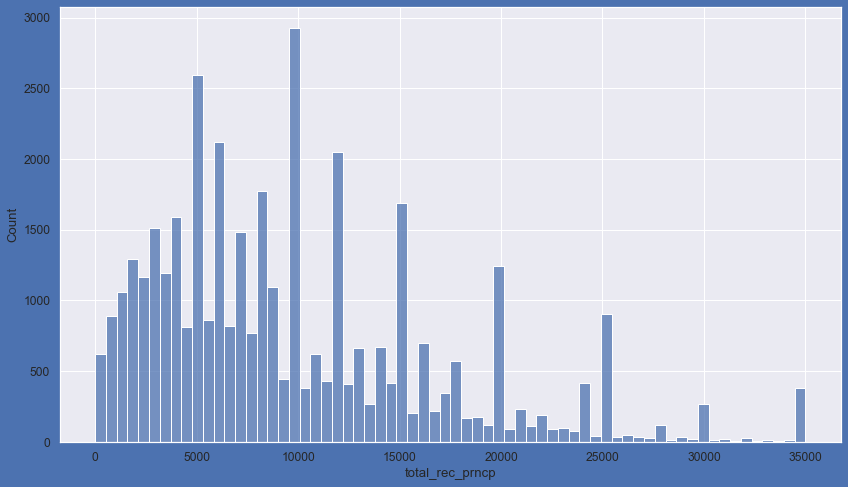

Hisplot of total_rec_int


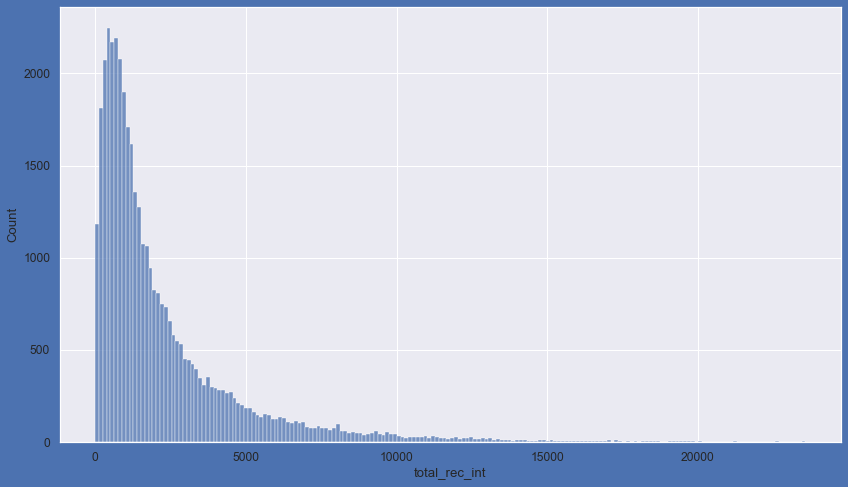

Hisplot of total_rec_late_fee


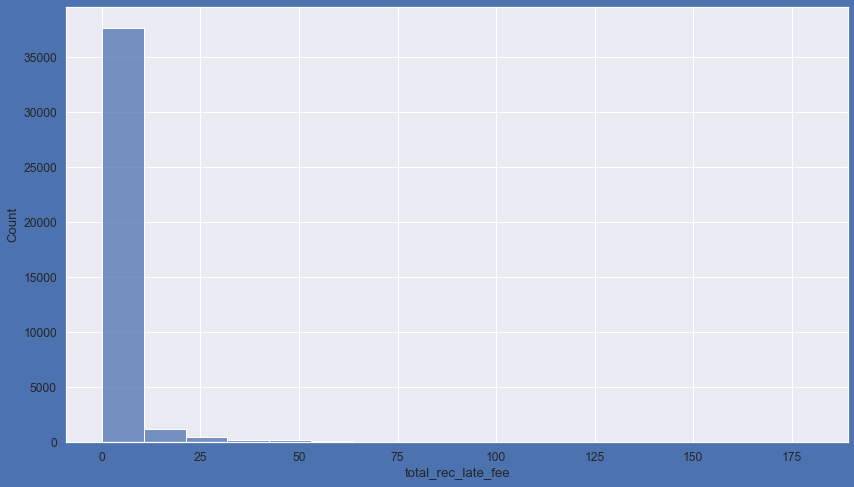

Hisplot of recoveries


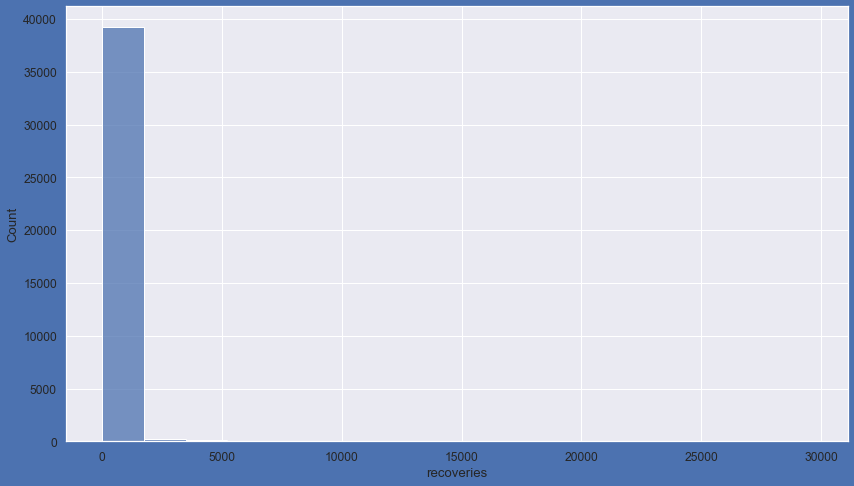

Hisplot of collection_recovery_fee


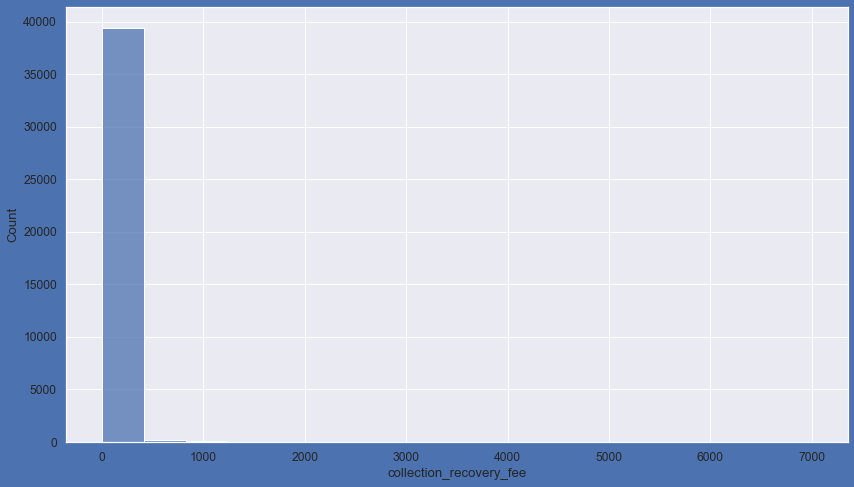

Hisplot of last_pymnt_amnt


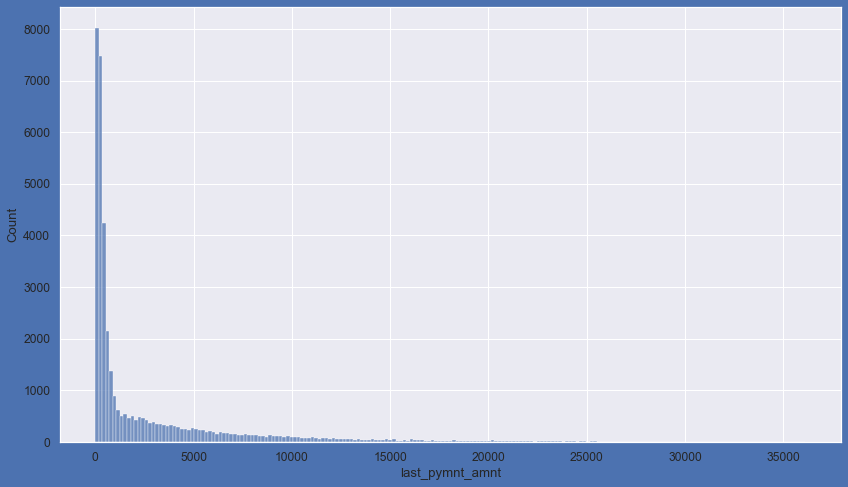

Hisplot of collections_12_mths_ex_med


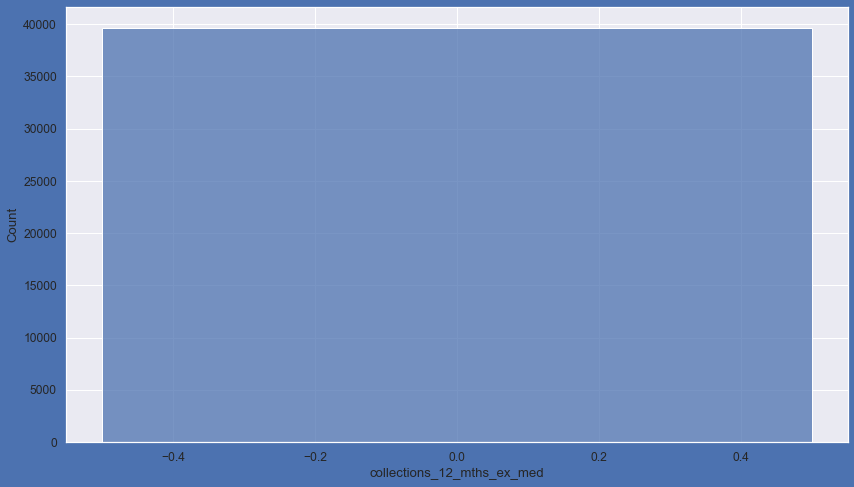

Hisplot of policy_code


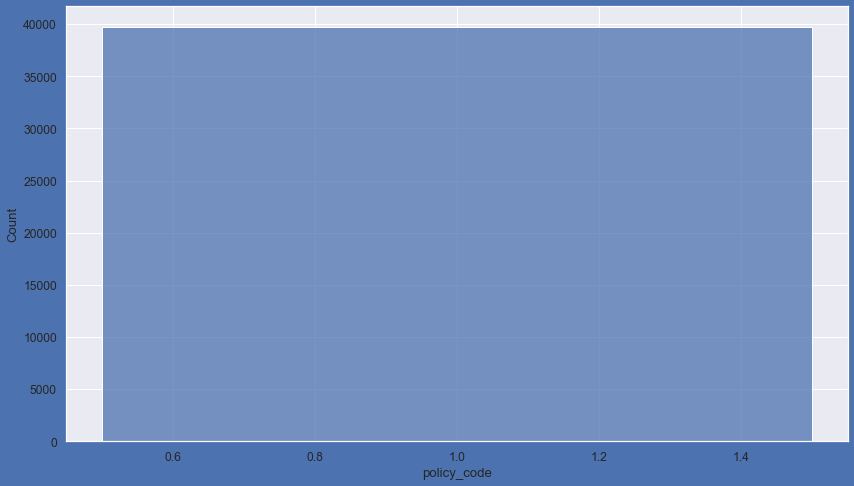

Hisplot of acc_now_delinq


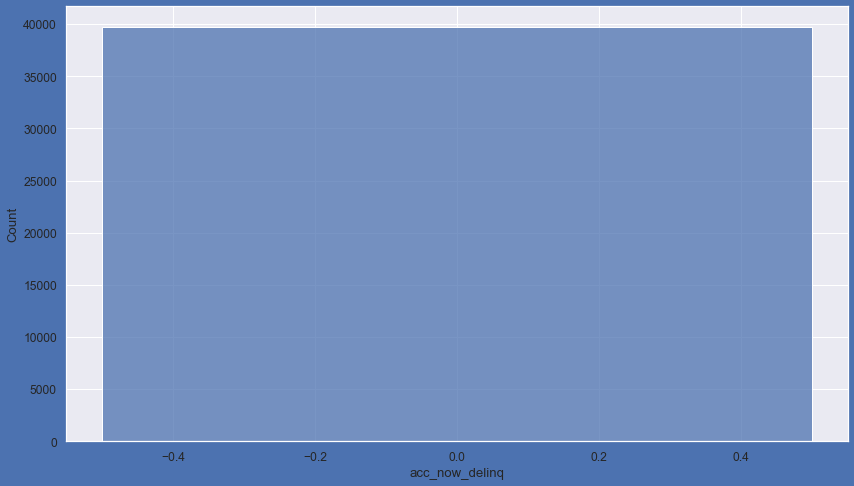

Hisplot of chargeoff_within_12_mths


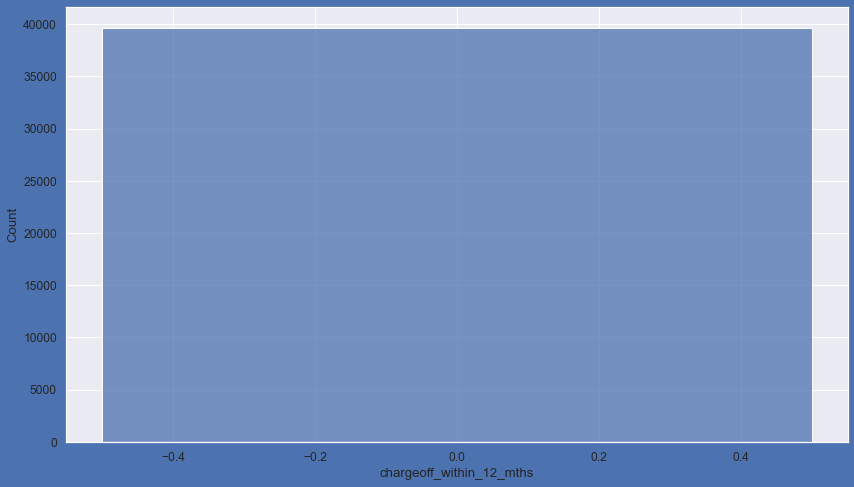

Hisplot of delinq_amnt


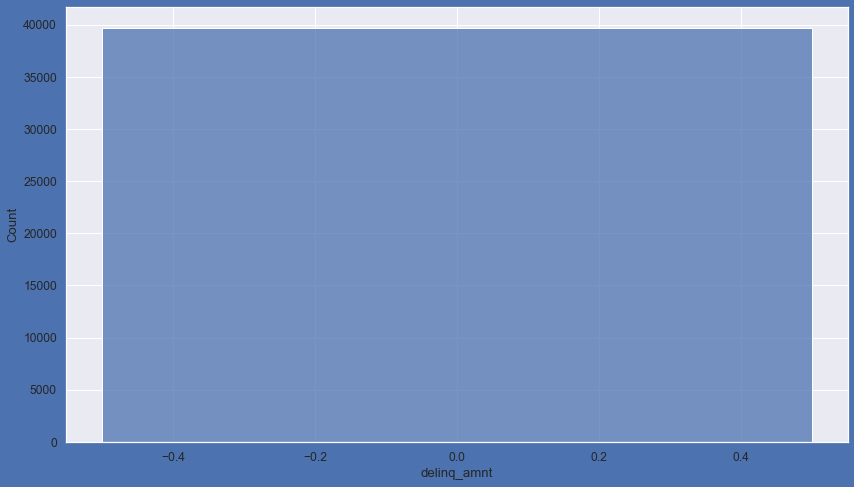

In [120]:
# Numeric Variables Histogram to look at the distribution
for i in num_var:
    print("Hisplot of",i)
    fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
    sns.histplot(x=df[i])
    plt.show()

In [46]:
# Insights from Univariate analysis on Numeric variables
#1) The distribution of loan amount, commited amount (funded amount) and committed amount by investors (funded_amount_inv) look fairly similar. The distribution is mostly between 2500 to 7500.
#2) Installments are mostly in the range of 100 to 300
#3) Employment length is mostly above 10+ years
#4) dti ratio is mostly distributed between 7.5 to 17.5
#5) These fields are either fairly distributed or have no pattern or no of occurences - delinq_2yrs
#inq_last_6mths
#pub_rec
#out_prncp
#out_prncp_inv
#total_rec_late_fee
#recoveries
#collection_recovery_fee
#collections_12_mths_ex_med
#policy_code
#acc_now_delinq
#chargeoff_within_12_mths
#delinq_amnt
#total_rec_int
#last_pymnt_amnt
#6) The number of open credit lines in the borrower's credit file are mostly between 4 to 12
#7)Total payment and Total Payment Inv is distributed between 4K to 12K
#8) Most of the interest rates are between 10-15% 

Countplot of term


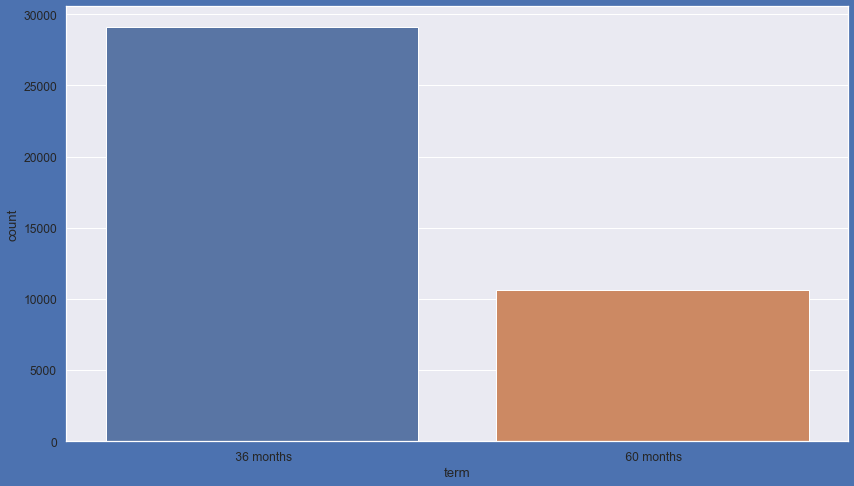

Countplot of grade


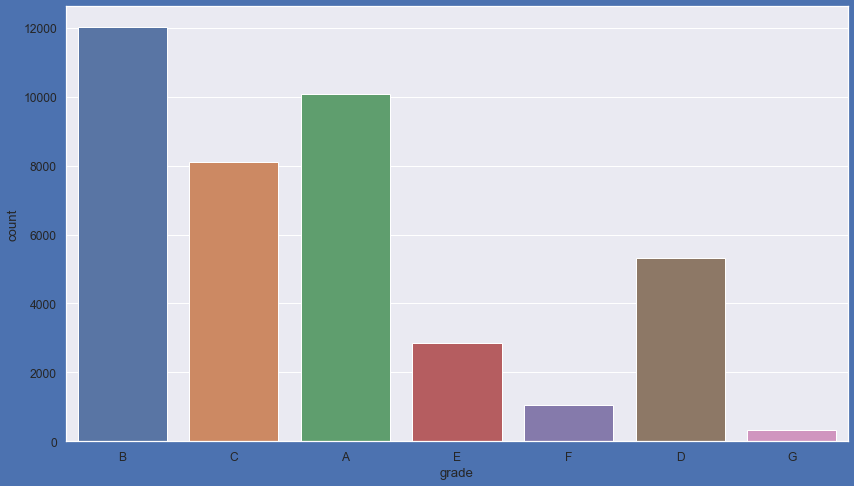

Countplot of sub_grade


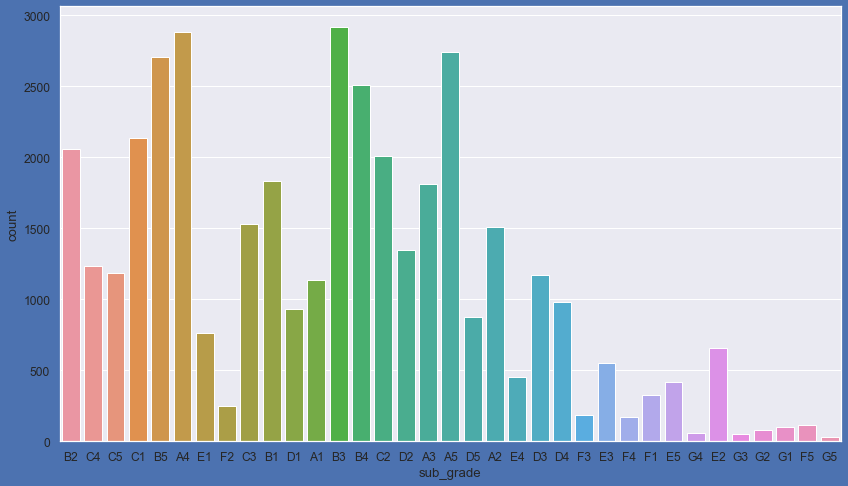

Countplot of home_ownership


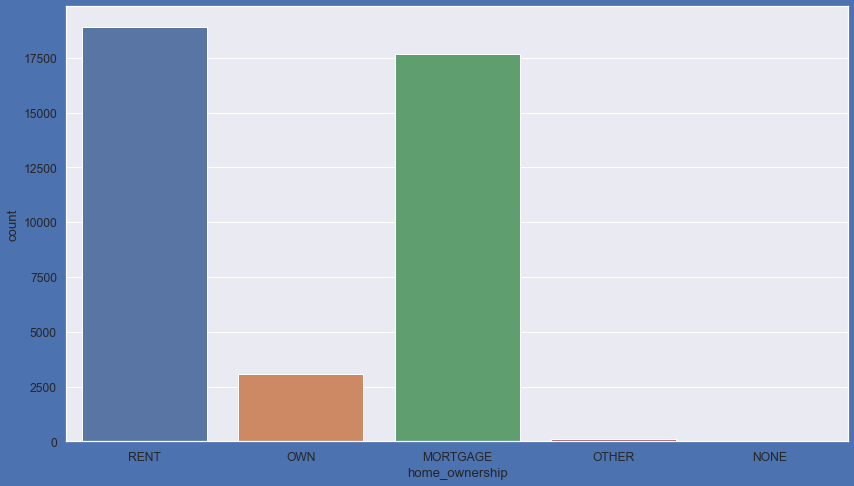

Countplot of verification_status


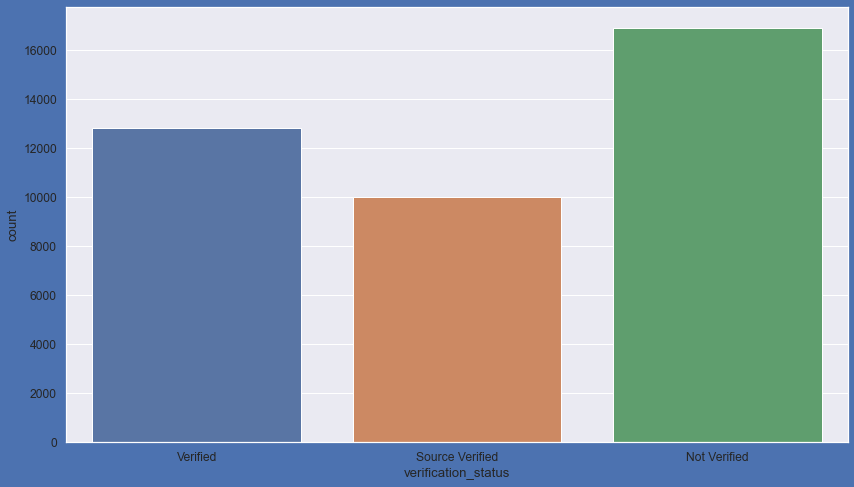

Countplot of issue_d


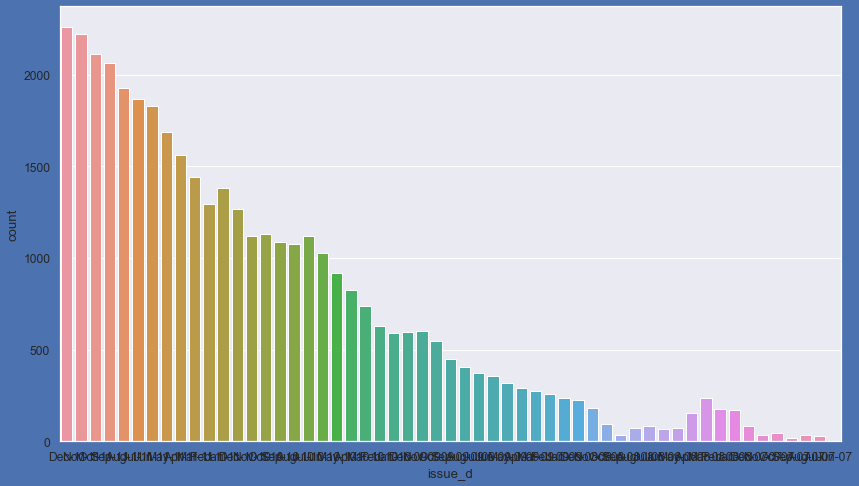

Countplot of loan_status


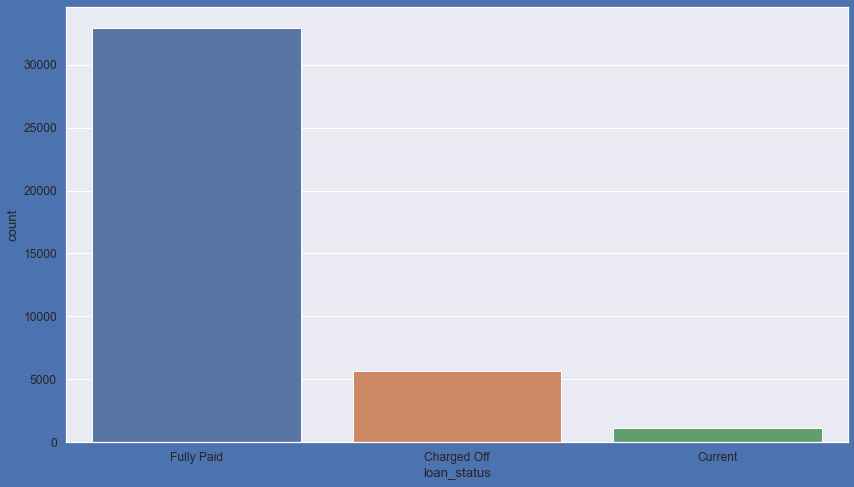

Countplot of pymnt_plan


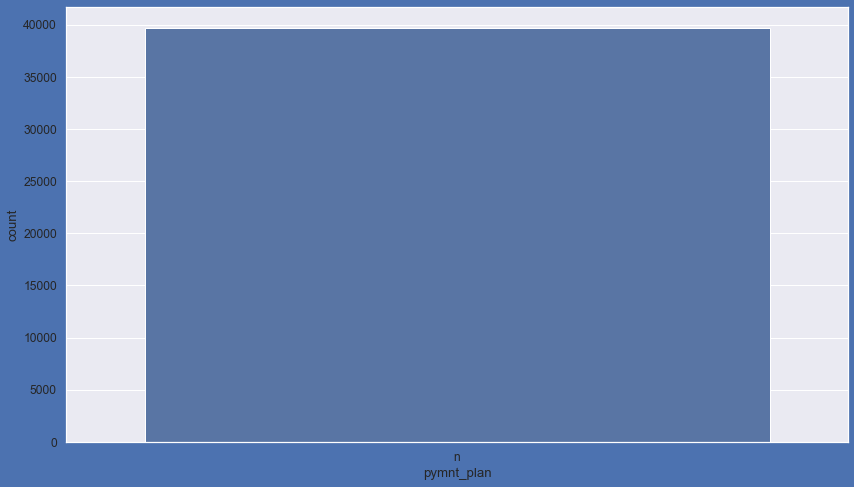

Countplot of purpose


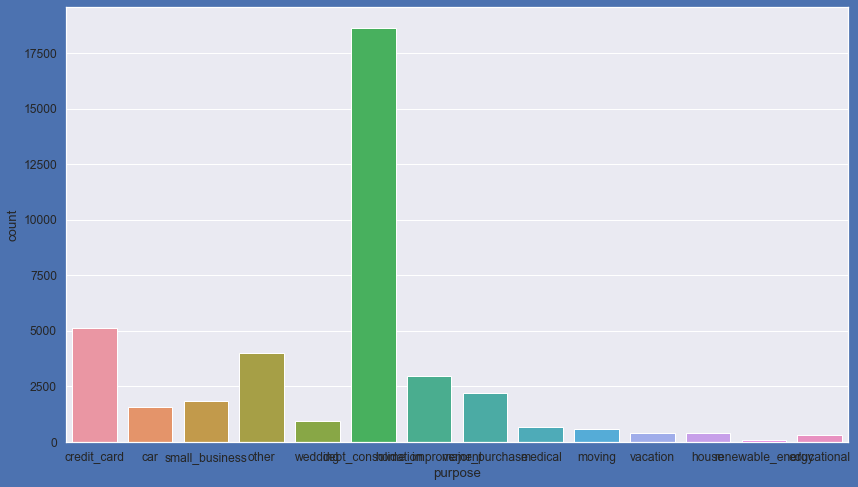

Countplot of addr_state


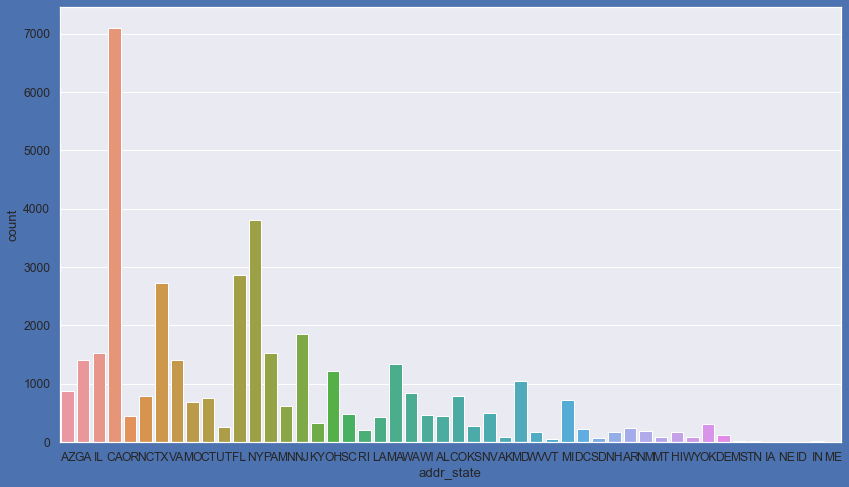

Countplot of earliest_cr_line


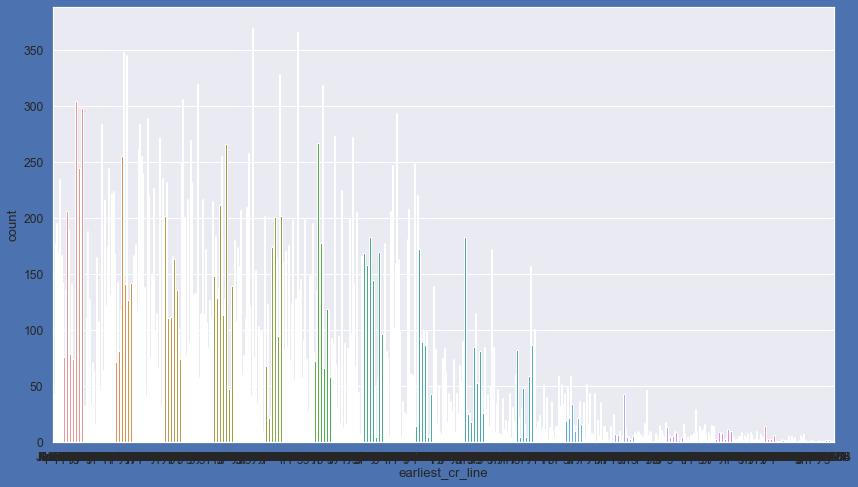

Countplot of revol_util


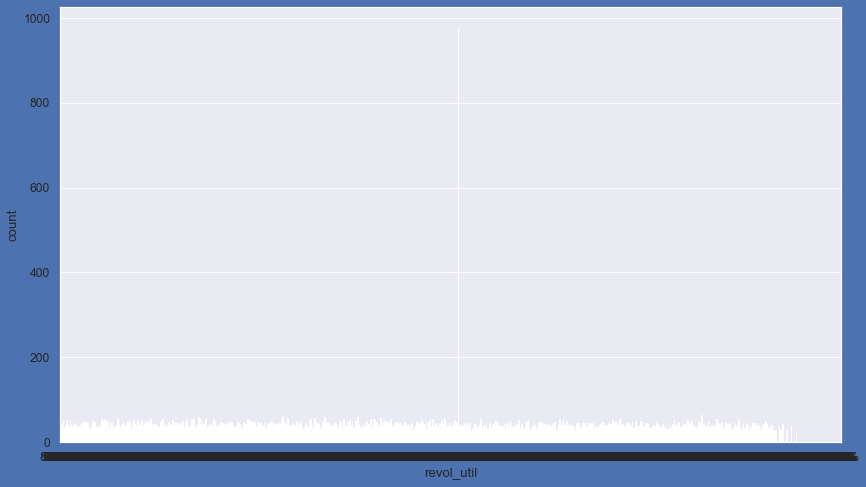

Countplot of initial_list_status


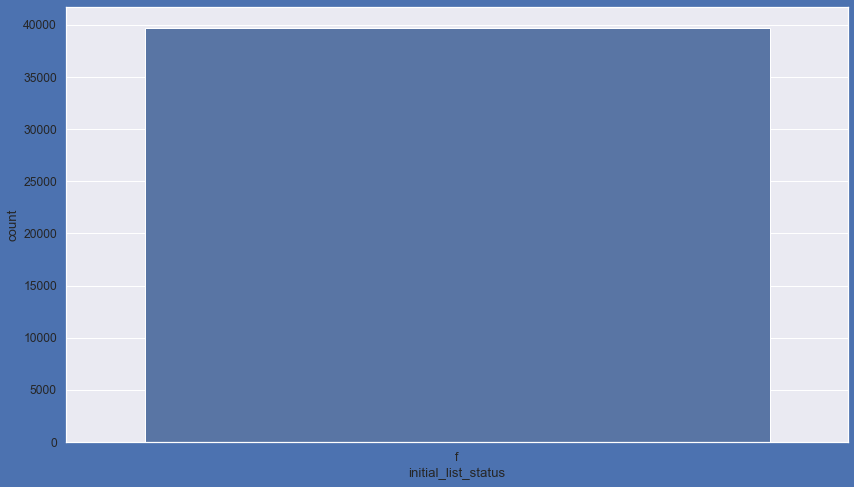

Countplot of last_pymnt_d


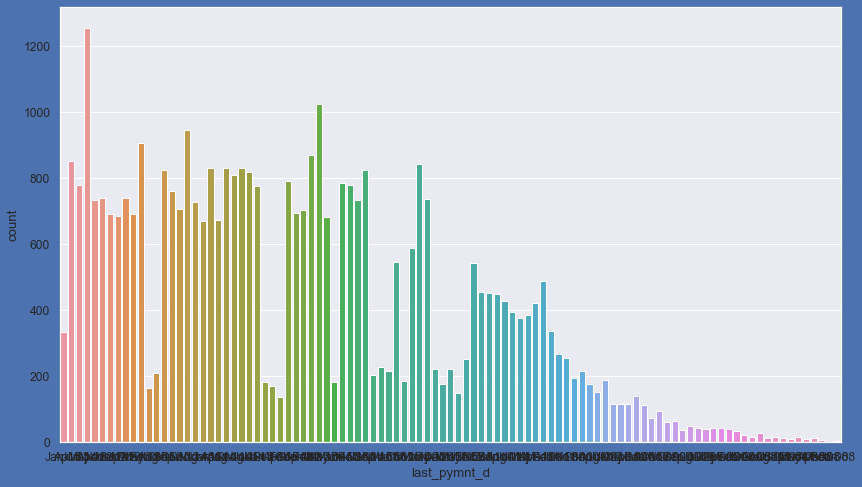

Countplot of last_credit_pull_d


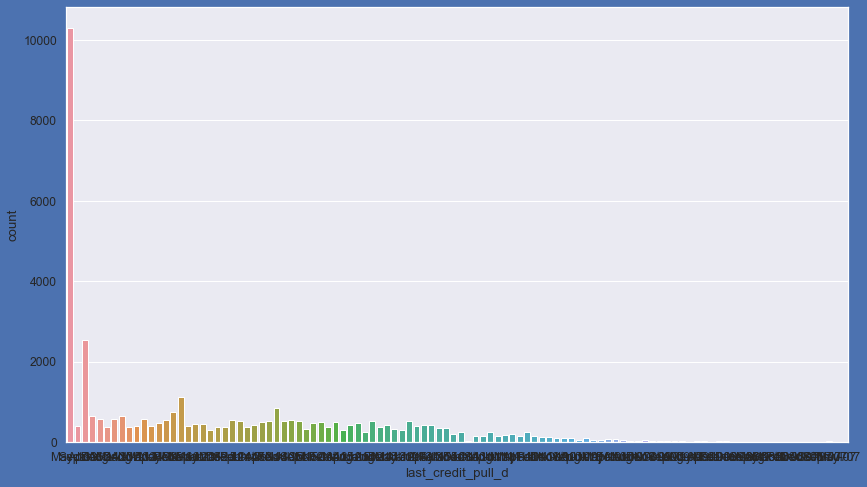

Countplot of application_type


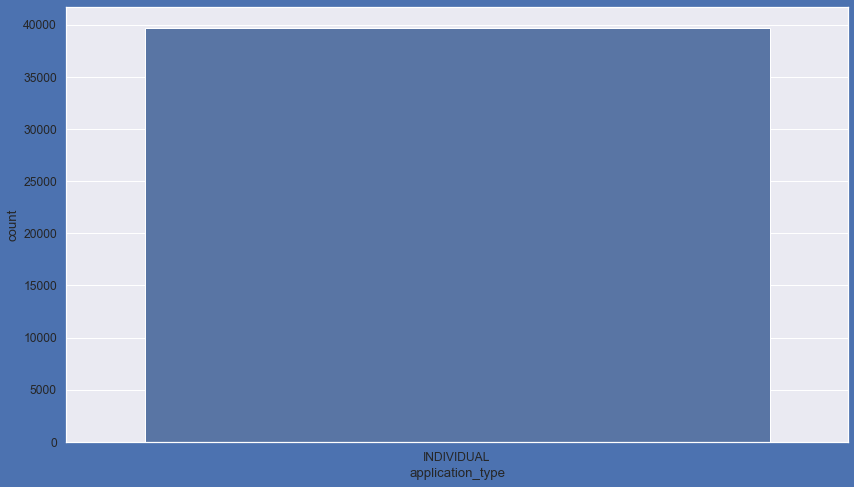

Countplot of pub_rec_bankruptcies


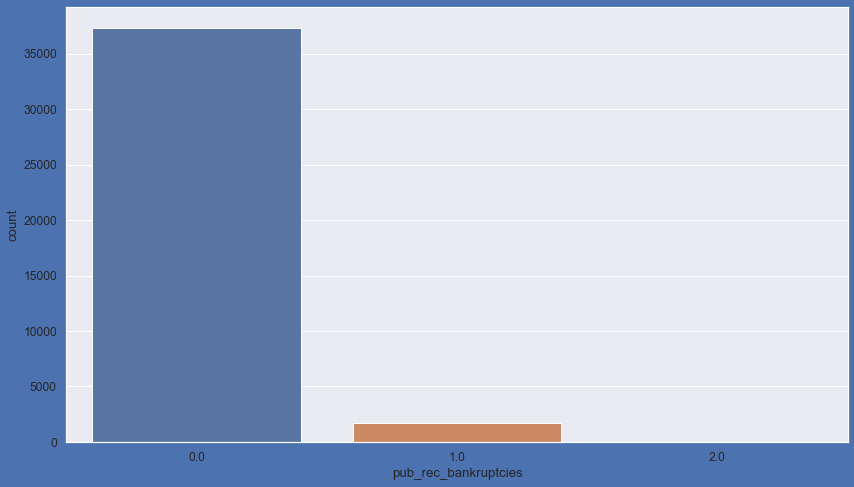

In [121]:
# Categorical Variables Countplot to look at the distribution
for i in obj_var:
    print("Countplot of",i)
    fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
    sns.countplot(x=df[i])
    plt.show()

In [48]:
# Insights of univariate analysis of categorical variables helps to understand the profile of most of the customers
#1) Most of the customers are having a term of 36 months
#2) Most of the customers are living on Rent or Mortgage
#3) Most of the customers are in Not Verified status
#4) Most of the customers have fully paid the loan amount
#5) Most of the customers have taken loan for purpose of debt consolidation & credit bill

# Bivariate Analysis and Segmented Analysis

In [50]:
loan_correlation=mod_df.corr()
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt
id,1.000000,0.113729,0.124942,0.228398,0.049439,0.094223,0.035617,0.096267,-0.007051,-0.043228,0.017315,-0.016408,0.008012,0.038047,NaN,NaN,0.099697,0.187309,0.081561,0.116098,-0.065255,0.042905,-0.007585,0.139277,NaN,NaN,NaN,NaN
loan_amnt,0.113729,1.000000,0.982261,0.936088,0.283147,0.157574,0.393921,0.102003,-0.040590,0.002596,0.162853,-0.042522,0.314861,0.234502,NaN,NaN,0.871638,0.835493,0.832769,0.726812,0.034198,0.144345,0.074256,0.463087,NaN,NaN,NaN,NaN
funded_amnt,0.124942,0.982261,1.000000,0.953811,0.289135,0.156984,0.390923,0.101006,-0.040352,0.003009,0.160771,-0.042774,0.306918,0.228892,NaN,NaN,0.888165,0.852085,0.850243,0.735767,0.036800,0.146488,0.076674,0.467835,NaN,NaN,NaN,NaN
funded_amnt_inv,0.228398,0.936088,0.953811,1.000000,0.282716,0.165855,0.373004,0.108636,-0.045112,-0.012028,0.149076,-0.045010,0.287817,0.222555,NaN,NaN,0.863634,0.899374,0.824340,0.725589,0.015381,0.132768,0.061355,0.460561,NaN,NaN,NaN,NaN
int_rate,0.049439,0.283147,0.289135,0.282716,1.000000,0.008397,0.046231,0.106781,0.151657,0.134051,-0.016446,0.105480,0.071023,-0.073242,NaN,NaN,0.269371,0.264655,0.153084,0.509907,0.084793,0.124936,0.066583,0.157048,NaN,NaN,NaN,NaN
emp_length,0.094223,0.157574,0.156984,0.165855,0.008397,1.000000,0.224709,0.060325,0.013775,0.011293,0.097067,0.056844,0.160434,0.204958,NaN,NaN,0.139507,0.148281,0.130130,0.124649,-0.017852,0.026852,0.005238,0.086265,NaN,NaN,NaN,NaN
annual_inc,0.035617,0.393921,0.390923,0.373004,0.046231,0.224709,1.000000,-0.048269,0.023511,0.030806,0.266462,-0.000341,0.373919,0.382717,NaN,NaN,0.369878,0.354771,0.370862,0.264257,-0.003396,0.035637,0.013722,0.209942,NaN,NaN,NaN,NaN
dti,0.096267,0.102003,0.101006,0.108636,0.106781,0.060325,-0.048269,1.000000,-0.030297,0.008442,0.301169,-0.008468,0.284960,0.252085,NaN,NaN,0.096675,0.102654,0.075240,0.127677,-0.011644,0.028778,0.014827,0.031500,NaN,NaN,NaN,NaN
delinq_2yrs,-0.007051,-0.040590,-0.040352,-0.045112,0.151657,0.013775,0.023511,-0.030297,1.000000,0.009636,0.015069,0.009243,-0.068621,0.066839,NaN,NaN,-0.032227,-0.037243,-0.045983,0.013603,0.024967,0.009858,0.008563,-0.017674,NaN,NaN,NaN,NaN
inq_last_6mths,-0.043228,0.002596,0.003009,-0.012028,0.134051,0.011293,0.030806,0.008442,0.009636,1.000000,0.092330,0.025566,-0.024325,0.107837,NaN,NaN,-0.019953,-0.029767,-0.033366,0.019380,0.031848,0.017882,0.010508,0.020766,NaN,NaN,NaN,NaN


In [51]:
# Insights from bivariate analysis
#1) Annual Income to Debt To Income Ratio i.e dti are negatively correlated
#2) Loan Amount,Investor Amount and Funding Amount are strongly correlated
#3) Positive correlation between Annual Income and employment years
#4) Positive correlation between annual income and funded amount that means people with high income gets high funded amount
#5) Positive correlation between annual income and total payment

In [54]:
# Bivariate Analysis to study impact of variables on loan status

In [82]:
# Annual Income vs Charged Off Proportion
inc_range_vs_loan = mod_df.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000+,701,5511,6212,0.112846


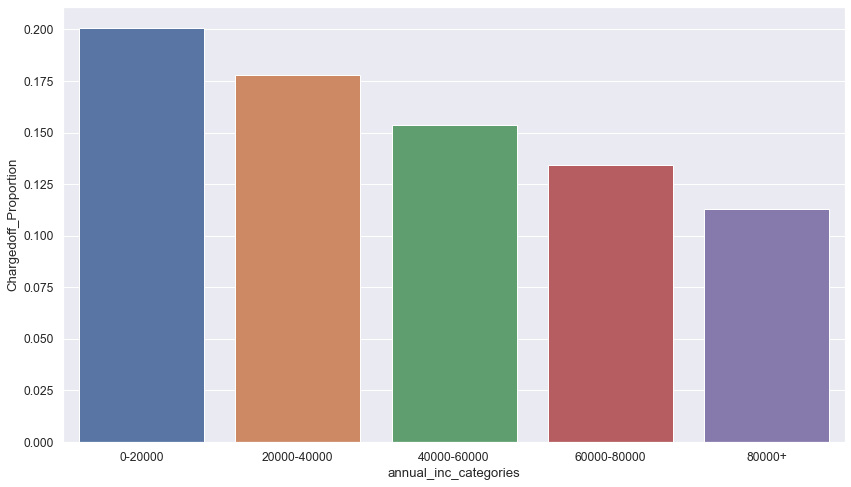

In [123]:
fig,ax1=plt.subplots(figsize=(14,8))
sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
plt.show()

In [84]:
# Insights on Annual Income vs Loan Status
#1) Income range 80000+ has less chances of charged off.
#2) Income range 0-20000 has high chances of charged off.
#3) With increase in annual income charged off proportion gets decreased. So, they are inversely proportional.

In [85]:
# Purpose of Loan vs Charged Off Proportion
purpose_vs_loan = mod_df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Proportion
11,small_business,436,1081,1517,0.287409
10,renewable_energy,18,71,89,0.202247
3,educational,53,252,305,0.173770
8,moving,89,428,517,0.172147
9,other,581,2969,3550,0.163662
7,medical,99,512,611,0.162029
5,house,50,269,319,0.156740
2,debt_consolidation,2579,13939,16518,0.156133
12,vacation,51,301,352,0.144886
4,home_improvement,301,2020,2321,0.129685


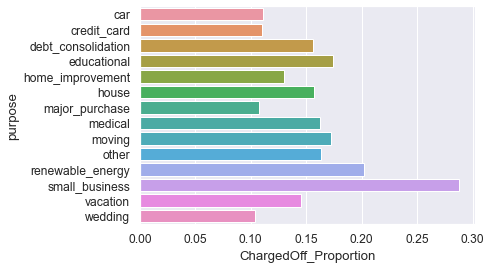

In [86]:
sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
plt.show()

In [87]:
# Insights on Purpose of Loan vs Charged Off Proportion
#1) Small Business applicants have high chances of getting charged off.
#2) Renewable_energy charged off proportion is better as compared to other categories

In [89]:
# Purpose of Loan vs Charged off Proportion
grade_vs_loan=mod_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,89,140,229,0.388646
5,F,269,542,811,0.331689
4,E,622,1646,2268,0.274250
3,D,1028,3550,4578,0.224552
2,C,1281,5857,7138,0.179462
1,B,1338,9259,10597,0.126262
0,A,578,8595,9173,0.063011


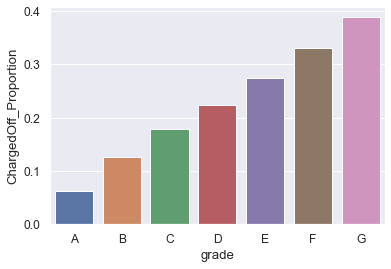

In [90]:
sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_vs_loan)
plt.show()

In [91]:
# Insights on Grade vs Charged Off Proportion
#1) Grade A has least chances of getting charged off
#2) Grade F and Grade G have high chances of getting charged off
#3)Chances of getting charged off is increasing with grades moving from A to G

In [92]:
# Sub-grade vs Charged off Proportion
grade_vs_loan=mod_df.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
32,G3,19,17,36,0.527778
29,F5,47,44,91,0.516484
31,G2,25,36,61,0.409836
34,G5,8,13,21,0.380952
30,G1,28,48,76,0.368421
28,F4,41,88,129,0.317829
26,F2,61,133,194,0.314433
27,F3,44,100,144,0.305556
23,E4,110,253,363,0.303030
25,F1,76,177,253,0.300395


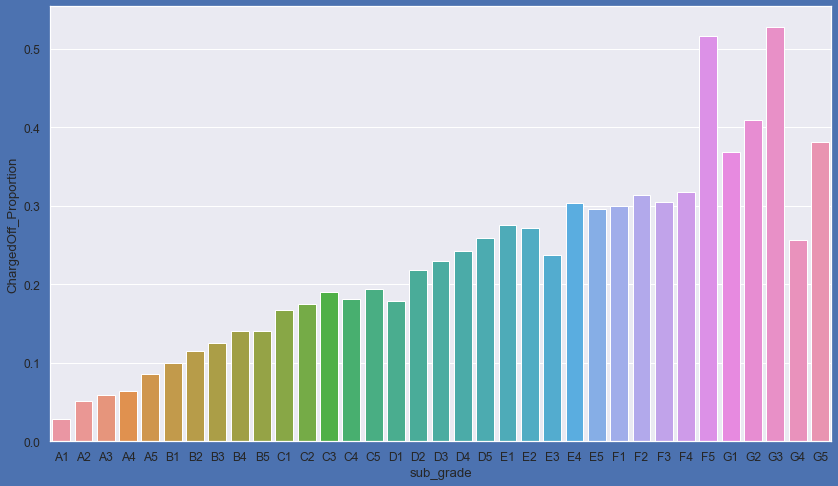

In [94]:
fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
sns.barplot(x='sub_grade',y='ChargedOff_Proportion',data=grade_vs_loan)
plt.show()

In [95]:
# Insights on Sub-Grade vs Charged Off Proportion
#1) Sub Grade A has least chances of getting charged off
#2) Sub Grade F and Sub Grade G have high chances of getting charged off
#3) Chances of getting charged off is increasing with Subgrades moving from A to G

In [96]:
# Interest Rate vs Charged off Proportion
interest_vs_loan = mod_df.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['ChargedOff_Proportion'] = interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,ChargedOff_Proportion
3,16+,1131,2899,4030,0.280645
2,12.5-16,1871,8524,10395,0.179990
1,10-13,1161,7347,8508,0.136460
0,0-10,793,10465,11258,0.070439


<AxesSubplot:xlabel='interest_rate_categories', ylabel='ChargedOff_Proportion'>

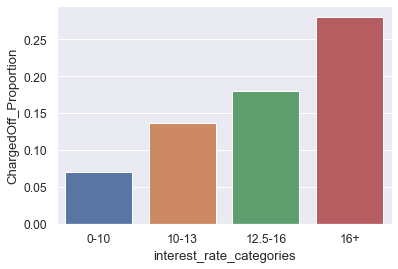

In [97]:
sns.barplot(x='interest_rate_categories',y='ChargedOff_Proportion',data=interest_vs_loan)

In [98]:
# Insights on Interest Rate vs Charged Off Proportion
#1.Interest Rates which are less than 10% have very less chances of charged off
#2.Interest Rates greater than 16 have higher chances of charged off
#3.Charged Off Proportion increases with higher interest rates

In [99]:
# Employment Length vs Charged off Proportion
emplen_vs_loan = mod_df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,225,775,1000,0.225000
10,10,1199,6097,7296,0.164337
7,7,241,1327,1568,0.153699
1,1,1031,6022,7053,0.146179
5,5,423,2490,2913,0.145211
8,8,181,1082,1263,0.143310
6,6,283,1695,1978,0.143074
3,3,518,3120,3638,0.142386
4,4,430,2626,3056,0.140707
2,2,531,3412,3943,0.134669


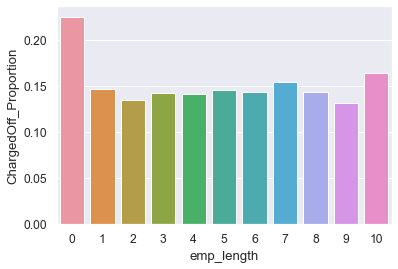

In [100]:
sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan)
plt.show()

In [101]:
# Insights on Employment Length vs Charged Off Proportion
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# Rest of the applicants have more or less same chnaces of getting charged off.

In [102]:
# Address State vs Charged off Proportion
state_vs_loan = mod_df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid']
state_vs_loan['ChargedOff_Proportion'] = state_vs_loan['Charged Off']/state_vs_loan['Total']
state_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,ChargedOff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,98.0,337.0,435.0,0.225287
13,ID,1.0,4.0,5.0,0.200000
0,AK,13.0,54.0,67.0,0.194030
40,SD,12.0,50.0,62.0,0.193548
9,FL,469.0,2093.0,2562.0,0.183060
11,HI,27.0,126.0,153.0,0.176471
31,NM,30.0,143.0,173.0,0.173410
24,MO,110.0,528.0,638.0,0.172414
4,CA,1022.0,5103.0,6125.0,0.166857


In [ ]:
fig,ax1=plt.subplots(figsize=(16,6))
sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_vs_loan)
plt.show()

In [105]:
# Insights on Address State vs Charged Off Proportion
#1)State NE has very high chances of charged off but number of applications are too low to make any decisions
#2) States NV,CA and FL states shows good number of charged offs with good number of applications

In [106]:
# Verification Status vs Charged off Proportion
verify_vs_loan = mod_df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total'] = verify_vs_loan['Charged Off']+verify_vs_loan['Fully Paid']
verify_vs_loan['ChargedOff_Proportion'] = verify_vs_loan['Charged Off']+verify_vs_loan['Total']
verify_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,Not Verified,2042,13705,15747,17789
2,Verified,1835,8503,10338,12173
1,Source Verified,1328,7381,8709,10037


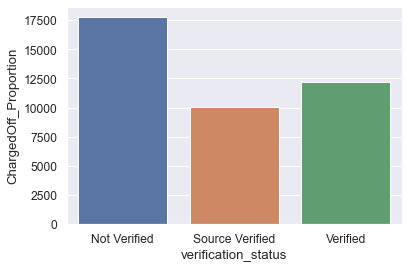

In [107]:
sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verify_vs_loan)
plt.show()

In [108]:
# Insights on Verification Status vs Charged Off Proportion
#1) Not Verified Status have higher chances of getting charged off when compared to verified status

In [109]:
# pub_rec_bankruptcies vs charged off proportion
bankruptcies_vs_loan = mod_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,346,1194,1540,0.224675
3,Not Known,106,522,628,0.168790
0,0.0,4751,27870,32621,0.145642


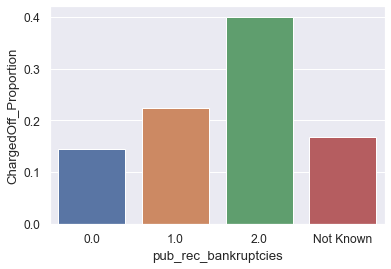

In [110]:
sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
plt.show()

In [111]:
# Insights on pub_rec_bankruptcies vs charged off proportion
#1) Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than those who have no pub_rec_bankruptcies.

In [112]:
# pub_rec (Derogatory public records) vs Charged Off Proportion
bankruptcies_vs_loan = mod_df.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,433.0,1459.0,1892.0,0.228858
2,2,10.0,36.0,46.0,0.217391
0,0,4762.0,28087.0,32849.0,0.144966
3,3,0.0,5.0,5.0,0.000000
4,4,0.0,2.0,2.0,0.000000


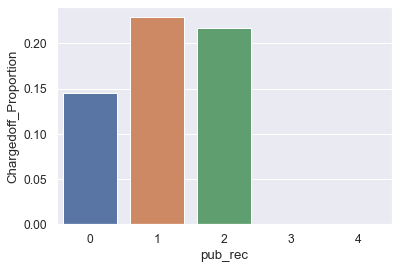

In [113]:
sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
plt.show()

In [114]:
# Insights on Derogatory Records vs Charged Off Proportion
#1 Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.

# Multivariate Analysis

In [ ]:
sns.pairplot(mod_df, hue = 'loan_status', diag_kind = 'kde',size = 4)
plt.show()